# Ciencia de datos (CC408) - Primavera 2024

## Trabajo Práctico 1 - Parte 2

### Reglas de formato y presentation
- El trabajo debe tener una extensión máxima de 8 páginas (no se permite Apéndice). Se espera una buena redacción en la resolución del práctico.
- El informe debe ser entregado en formato PDF, con los gráficos e imágenes en este mismo archivo.
- Entregar el código con los comandos utilizados, identificando claramente a qué inciso corresponde cada comando.

### Fecha de entrega:
Miércoles 2 de octubre a las 23:59 hs.

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub llamado “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 - Parte 2 deben estar dentro de esa carpeta.
- También deben enviar el link de su repositorio -para que pueda ser clonado y corregido- al siguiente email: ispiousas@udesa.edu.ar
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No envien el correo hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. Debido a que se pueden tomar hasta 3 días de extensión a lo largo del curso, no se corregirán sus tareas hasta no recibir el correo.
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija. 

### Parte I: Limpieza de la base

#### Ejercicio 1
La base de datos provista contiene información sobre oferentes de Airbnb en la ciudad de Nueva York. Realicen una limpieza de la base.
- Tengan en cuenta si hay valores duplicados y eliminénlos.
- Eliminen las columnas que no tienen información de interés.
- (Opcional) Luego de leer el artículo __[Missing-data imputation](https://bookdown.org/mike/data_analysis/imputation-missing-data.html##imputation-missing-data)__ (__[Missing-data imputation articulo alternativo](http://www.stat.columbia.edu/~gelman/arm/missing.pdf)__), decidan qué hacer con los missing values e implementen su decision. Justifiquen su eleccion. Pueden usar informacion del paper mencionado o de otras fuentes (citenlas si las usan) para explicar los problemas que pueden surgir por su estrategia elegida.
- Si hay observaciones con *outliers* o valores que no tienen sentido, tomen una decision. Expliquen las decisiones tomadas.
- Transformen las variables **‘neighbourhood_group’** y **‘room_type’** a variables numericas.
- Con la ayuda de los comandos <code>groupby</code> y <code>join</code> o <code>merge</code>, creen una columna que tenga la cantidad de oferentes por “Neighbourhood group”. Llamen a esa nueva columna <code>offer group</code>

In [14]:
# Resolver acá
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.model_selection import train_test_split

In [15]:
# base tizi
#primera_base_airbnb = pd.read_csv(r"C:\Users\tizip\OneDrive\Documentos\Tizi UdeSA\8- Ciencia de datos\CC408-T1-4\TP2 probar\TP2\Base Airbnb NY.csv")

# base angie
primera_base_airbnb = pd.read_csv(r'/Users/angelanavajas/Desktop/Ciencia de datos/TP1/CC408-T1-4/TP2 probar/TP2/Base Airbnb NY.csv')

print(primera_base_airbnb)

             id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48900  19454344  Perfect ap in Manhattan! Walking to Central Park!  11670284   
48901  36224876                   Upper East Side Apt By The Water  46232598   
48902  21869051                        Comfy Apt in NYC Brownstone  97243693   
48903   3004563                                           The spot  15303460   
48904  19712687               Sunny, spacious, homey Brooklyn loft  11989253   

         host_name neighbourhood_group 

In [16]:
#elimino datos 
base_airbnb_completa = primera_base_airbnb.dropna()

#elimino datos duplicados
base_airbnb_limpia = base_airbnb_completa.drop_duplicates()
print(base_airbnb_limpia)

             id                                              name    host_id  \
0          2539                Clean & quiet apt home by the park       2787   
1          2595                             Skylit Midtown Castle       2845   
3          3831                   Cozy Entire Floor of Brownstone       4869   
4          5022  Entire Apt: Spacious Studio/Loft by central park       7192   
5          5099         Large Cozy 1 BR Apartment In Midtown East       7322   
...         ...                                               ...        ...   
48782  36425863        Lovely Privet Bedroom with Privet Restroom   83554966   
48790  36427429                          No.2 with queen size bed  257683179   
48799  36438336                                   Seas The Moment  211644523   
48805  36442252                     1B-1B apartment near by Metro  273841667   
48852  36455809           Cozy Private Room in Bushwick, Brooklyn   74162901   

         host_name neighbourhood_group 

In [17]:
#Elimino columnas que no nos interesan
# Los nombres del host ni del lugar, como los id, no nos interesan ya que no nos son relevantes a la hora de hacer predicciones 
base_airbnb_columnas = base_airbnb_limpia.drop(columns=['id','name','host_name','host_id'])
print(base_airbnb_columnas)

      neighbourhood_group    neighbourhood  latitude  longitude  \
0                Brooklyn       Kensington  40.64749  -73.97237   
1               Manhattan          Midtown  40.75362  -73.98377   
3                Brooklyn     Clinton Hill  40.68514  -73.95976   
4               Manhattan      East Harlem  40.79851  -73.94399   
5               Manhattan      Murray Hill  40.74767  -73.97500   
...                   ...              ...       ...        ...   
48782           Manhattan  Upper East Side  40.78099  -73.95366   
48790              Queens         Flushing  40.75104  -73.81459   
48799       Staten Island      Great Kills  40.54179  -74.14275   
48805               Bronx       Mott Haven  40.80787  -73.92400   
48852            Brooklyn         Bushwick  40.69805  -73.92801   

             room_type  price  minimum_nights  number_of_reviews last_review  \
0         Private room  149.0               1                  9  2018-10-19   
1      Entire home/apt  225.0      

In [18]:
# la opcional

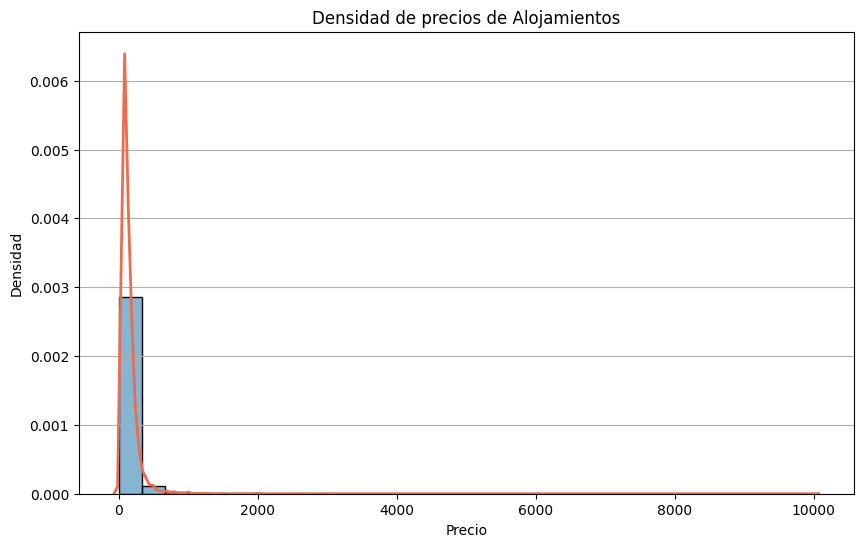

In [19]:
# DENSIDAD DE PRECIOS DE ALOJAMIENTOS
plt.figure(figsize=(10, 6))
sns.histplot(base_airbnb_columnas['price'], bins=30, color='#3685B5', kde=False, stat="density", alpha=0.6)
sns.kdeplot(base_airbnb_columnas['price'], color='#EE6C4D', linewidth=2)
plt.title('Densidad de precios de Alojamientos')
plt.xlabel('Precio')
plt.ylabel('Densidad')
plt.grid(axis='y')
plt.show()

   neighbourhood_group        room_type       price
0                Bronx  Entire home/apt  120.762215
1                Bronx     Private room   57.135755
2                Bronx      Shared room   56.930233
3             Brooklyn  Entire home/apt  171.282177
4             Brooklyn     Private room   73.345480
5             Brooklyn      Shared room   45.458621
6            Manhattan  Entire home/apt  230.212371
7            Manhattan     Private room  106.600762
8            Manhattan      Shared room   77.980337
9               Queens  Entire home/apt  139.225603
10              Queens     Private room   69.307807
11              Queens      Shared room   64.467105
12       Staten Island  Entire home/apt  125.366667
13       Staten Island     Private room   57.584906
14       Staten Island      Shared room   57.600000


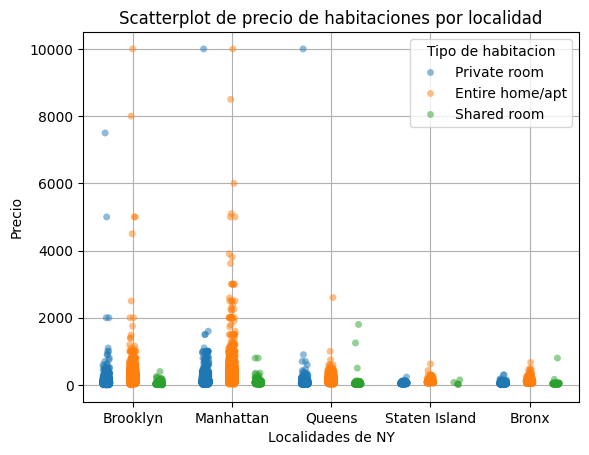

In [20]:
### DISTRIBUCION PRECIO POR TIPO DE HABITACION POR LOCALIDAD
means_loc_hab = base_airbnb_columnas.groupby(['neighbourhood_group', 'room_type'])['price'].mean().reset_index()
print(means_loc_hab)

sns.stripplot(data = base_airbnb_columnas, x = "neighbourhood_group", y = "price", hue = "room_type", dodge = True, alpha = 0.5)
plt.title("Scatterplot de precio de habitaciones por localidad")
plt.xlabel("Localidades de NY")
plt.ylabel("Precio")
plt.legend(title = "Tipo de habitacion")
plt.grid()
plt.show()

In [21]:
# OUTLIERS DE PRECIO POR TIPO DE HABITACION POR LOCALIDAD
Q1_2 = base_airbnb_columnas.groupby(['neighbourhood_group', 'room_type'])['price'].quantile(0.05)
Q3_2 = base_airbnb_columnas.groupby(['neighbourhood_group', 'room_type'])['price'].quantile(0.95)
IQR_2 = Q3_2 - Q1_2
lower_precio_hab_loc = Q1_2 - 1.5 * IQR_2
upper_precio_hab_loc = Q3_2 + 1.5 * IQR_2

# Crear un DataFrame con los límites de los cuantiles
limits_precio_hab_loc = pd.DataFrame({'lower_precio_hab_loc': lower_precio_hab_loc, 'upper_precio_hab_loc': upper_precio_hab_loc}).reset_index()
# Unir los límites al DataFrame original en los localidad
base_airbnb_limites_hab = pd.merge(base_airbnb_columnas, limits_precio_hab_loc, on = ['neighbourhood_group', 'room_type'])

# me quedo solo con los datos uqe son mayor o igual a "lower" y menor o igual a "upper"
base_airbnb_outliers = base_airbnb_limites_hab[
    (base_airbnb_limites_hab['price'] >= base_airbnb_limites_hab['lower_precio_hab_loc']) & 
    (base_airbnb_limites_hab['price'] <= base_airbnb_limites_hab['upper_precio_hab_loc'])]

print(base_airbnb_outliers)

      neighbourhood_group     neighbourhood  latitude  longitude  \
0                Brooklyn        Kensington  40.64749  -73.97237   
1               Manhattan           Midtown  40.75362  -73.98377   
2                Brooklyn      Clinton Hill  40.68514  -73.95976   
3               Manhattan       East Harlem  40.79851  -73.94399   
4               Manhattan       Murray Hill  40.74767  -73.97500   
...                   ...               ...       ...        ...   
38803            Brooklyn  Brooklyn Heights  40.69827  -73.99649   
38804           Manhattan   Upper East Side  40.78099  -73.95366   
38805              Queens          Flushing  40.75104  -73.81459   
38807               Bronx        Mott Haven  40.80787  -73.92400   
38808            Brooklyn          Bushwick  40.69805  -73.92801   

             room_type  price  minimum_nights  number_of_reviews last_review  \
0         Private room  149.0               1                  9  2018-10-19   
1      Entire home/apt 

   neighbourhood_group        room_type       price
0                Bronx  Entire home/apt  118.967320
1                Bronx     Private room   56.203455
2                Bronx      Shared room   36.170732
3             Brooklyn  Entire home/apt  162.682121
4             Brooklyn     Private room   68.853794
5             Brooklyn      Shared room   42.885017
6            Manhattan  Entire home/apt  216.159491
7            Manhattan     Private room   99.120538
8            Manhattan      Shared room   72.332386
9               Queens  Entire home/apt  136.964347
10              Queens     Private room   63.053484
11              Queens      Shared room   41.939597
12       Staten Island  Entire home/apt  122.013423
13       Staten Island     Private room   56.462025
14       Staten Island      Shared room   57.600000


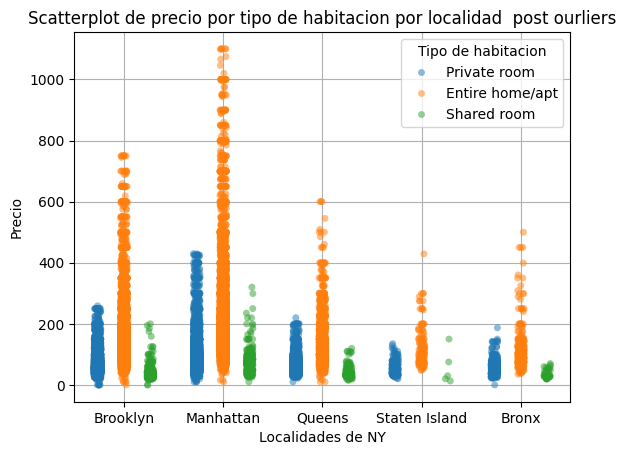

In [22]:
# DISTRIBUCIÓN PRECIO POR HABITACION POR LOCALIDAD POST DEPURACION
means_hab_loc_out = base_airbnb_outliers.groupby(['neighbourhood_group', 'room_type'])['price'].mean().reset_index()
print(means_hab_loc_out)

sns.stripplot(data = base_airbnb_outliers, x = "neighbourhood_group", y = "price", hue = "room_type", dodge = True, alpha = 0.5)
plt.title("Scatterplot de precio por tipo de habitacion por localidad  post ourliers") 
plt.xlabel ("Localidades de NY")
plt.ylabel ("Precio")
plt.legend(title = "Tipo de habitacion")
plt.grid()
plt. show()

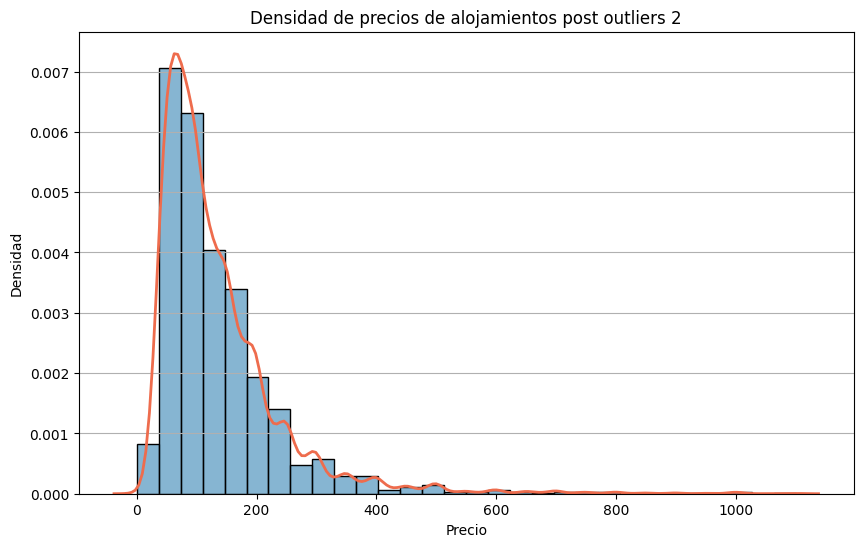

In [23]:
# DENSIDAD DE PRECIOS DE ALOJAMIENTOS POST OUTLIERS 2
plt.figure(figsize=(10, 6))
sns.histplot(base_airbnb_outliers['price'], bins=30, color='#3685B5', kde=False, stat="density", alpha=0.6)
sns.kdeplot(base_airbnb_outliers['price'], color='#EE6C4D', linewidth=2)
plt.title('Densidad de precios de alojamientos post outliers 2')
plt.xlabel('Precio')
plt.ylabel('Densidad')
plt.grid(axis='y')
plt.show()

In [24]:
#### DISTRIBUCIÓN DE CANTIDAD MINIMA DE NOCHES Y PRECIO

In [25]:
# OUTLIERS --> base_airbnb_outliers2

In [26]:
# DISTRIBUCIÓN

In [27]:
# DENSIDAD POST OUTLIERS 2

In [28]:
#### DISTRIBUCIÓN DE CANTIDAD MINIMA DE NOCHES Y TIPO DE HABITACION

In [29]:
# OUTLIERS --> base_airbnb_outliers3

In [30]:
# DISTRIBUCIÓN

In [31]:
# DENSIDAD POST OUTLIERS 3

In [32]:
#### DISTRIBUCIÓN DE CANTIDAD MINIMA DE NOCHES Y DISPONIBILIDAD 365 ???

In [33]:
# OUTLIERS --> base_airbnb_outliers4

In [34]:
# DISTRIBUCIÓN

In [35]:
# DENSIDAD POST OUTLIERS 4

In [36]:
print(f"Número de filas antes de eliminar outliers: {base_airbnb_columnas.shape[0]}")
print(f"Número de filas después de eliminar outliers: {base_airbnb_outliers.shape[0]}")

Número de filas antes de eliminar outliers: 38809
Número de filas después de eliminar outliers: 38547


In [58]:
# VARIABLES CATEGORICAS A DUMMIES

# Para transformar las variables categoricas neighbourhood_group y room_type en variables numericas aplico One-Hot Encoding 

# Separa las categorias de la variable en distintas columnas y le pone valor True si cumple la categoria o False si no
dummies = pd.get_dummies(base_airbnb_outliers[['neighbourhood_group', 'room_type']], drop_first=False)

# Concateno las variables transformadas a la base limpia
base_airbnb_transformadas = pd.concat([base_airbnb_outliers, dummies], axis=1)

# Columnas a las que me interesa cambiarle los valores de True/False a 0 y 1
columnas = [
    'neighbourhood_group_Brooklyn', 
    'neighbourhood_group_Manhattan', 
    'neighbourhood_group_Queens', 
    'neighbourhood_group_Staten Island', 
    'neighbourhood_group_Bronx',
    'room_type_Private room', 
    'room_type_Shared room',
    'room_type_Entire home/apt'
]

# Le cambio el valor de True/False en 0 y 1
for col in columnas:
    if col in base_airbnb_transformadas.columns:
        base_airbnb_transformadas[col] = base_airbnb_transformadas[col].astype(int)

# Verificar las columnas finales
print(base_airbnb_transformadas.columns)

Index(['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'last_review', 'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'lower_precio_hab_loc', 'upper_precio_hab_loc',
       'neighbourhood_group_Bronx', 'neighbourhood_group_Brooklyn',
       'neighbourhood_group_Manhattan', 'neighbourhood_group_Queens',
       'neighbourhood_group_Staten Island', 'room_type_Entire home/apt',
       'room_type_Private room', 'room_type_Shared room'],
      dtype='object')


In [59]:
#Creo la nueva variable que cuenta la cantidiad de oferta por localidad
oferta = base_airbnb_transformadas.groupby('neighbourhood_group').size().reset_index(name='offer group')
base_airbnb = base_airbnb_transformadas.merge(oferta, on='neighbourhood_group', how='left')

### Parte II: Graficos y visualizaciones

#### Ejercicio 2
Una vez hecha la limpieza, realicen una matriz de correlación con las siguientes variables:**‘neighbourhood group’, ‘latitude’, ‘longitude’, ‘room type’,‘price’, ‘minimum nights’, ‘number of reviews’, ‘reviews per month’,‘calculated host listings count’, ‘availability 365’.** Comenten los resultados. Utilicen alguno de los comandos disponibles en este link para graficar la matriz de correlacion.

*Nota:* consideren cómo es conveniente incluir las variables que originalmente eran categóricas para poder interpretar mejor la matriz de correlación.

In [60]:
# Lista de variables para al correlacion
variables_corr =  ['latitude', 'longitude', 'price', 'minimum_nights', 
                   'number_of_reviews', 'reviews_per_month', 
                   'calculated_host_listings_count', 'availability_365',
                   'neighbourhood_group_Bronx', 'neighbourhood_group_Brooklyn', 
                   'neighbourhood_group_Manhattan', 'neighbourhood_group_Queens', 
                   'room_type_Private room', 'room_type_Shared room']

# Creo un nuevo DataFrame con columnas únicas (.loc[:, eso puse para que no me duplique las columnas)
base_airbnb_corr = base_airbnb.loc[:, variables_corr]

# Matriz de correlación
matriz_corr = base_airbnb_corr.corr()

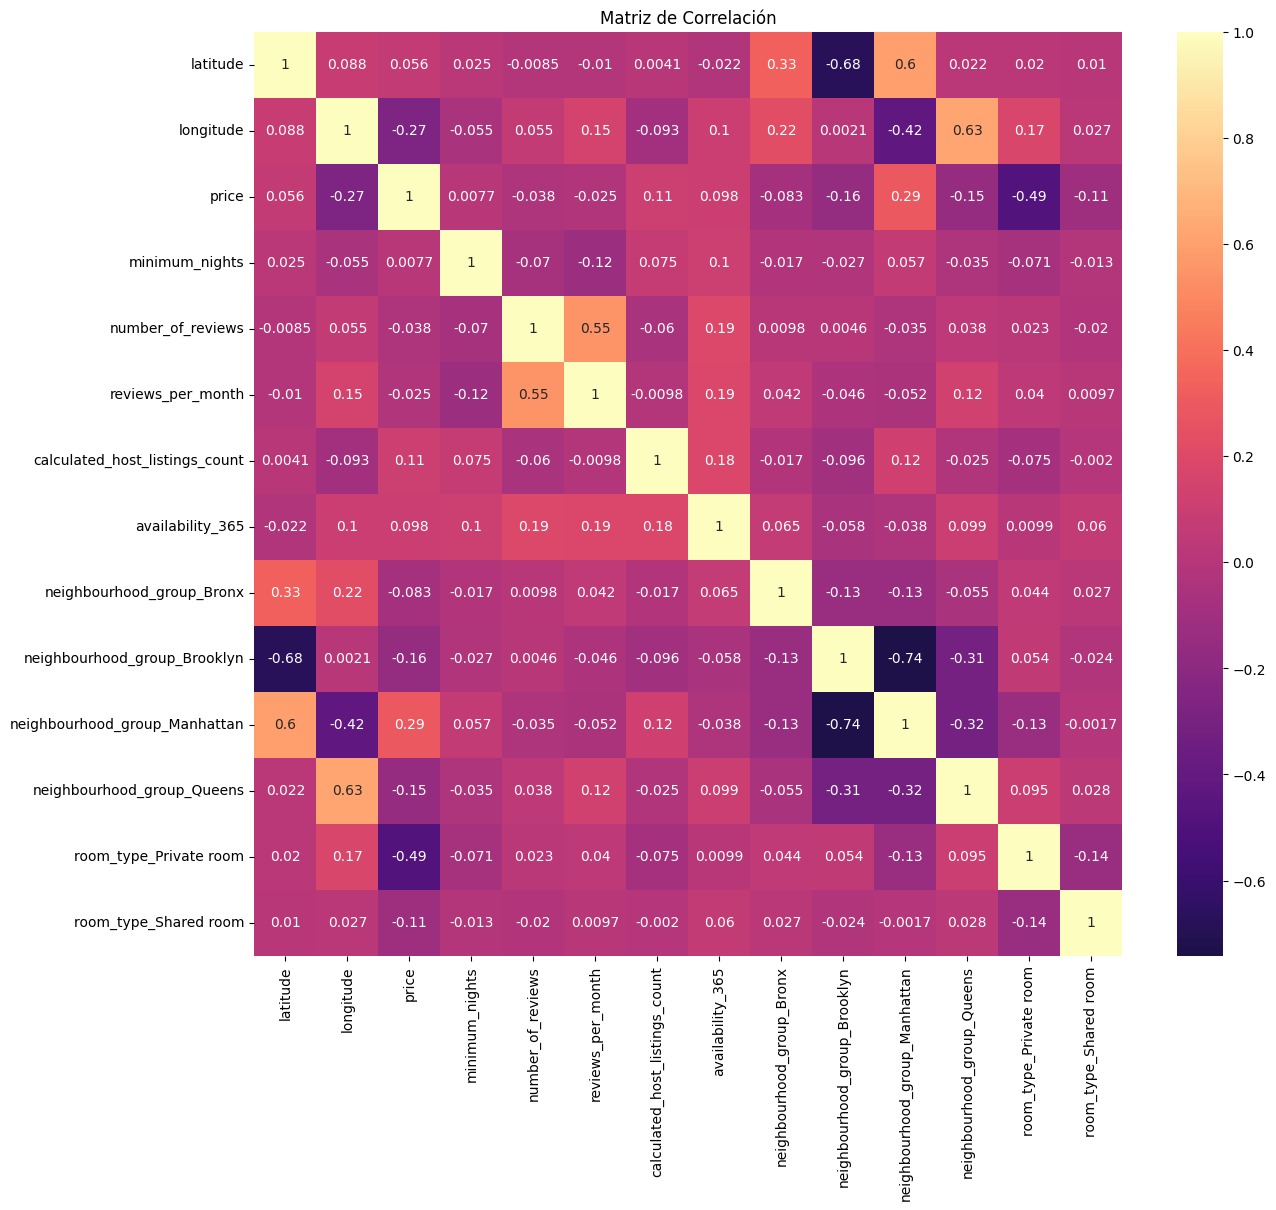

In [61]:
#Grafico la matriz de correlacion, no se si esta bien esto porque no me aparece ningun link ahi arriba pero bueno mientras tanto es algo
plt.figure(figsize=(14, 12))
sns.heatmap(matriz_corr, annot=True, cmap='magma', center=0)
plt.title('Matriz de Correlación')
plt.show()

#### Ejercicio 3
Respondan las siguientes preguntas: ¿Cuál es la proporción de oferentes por “Neighbourhood group”? ¿Y por tipo de habitación? Además, realicen gráficos para mostrar estas composiciones y comenten los resultados.

In [62]:
# Resolver acá
proporcion_neighbourhood = base_airbnb['neighbourhood_group'].value_counts(normalize=True) * 100
proporcion_room_type = base_airbnb['room_type'].value_counts(normalize=True) * 100

print("Proporción de oferentes por 'Neighbourhood group':")
print(proporcion_neighbourhood)
print("\nProporción de oferentes por 'Tipo de habitación':")
print(proporcion_room_type)

Proporción de oferentes por 'Neighbourhood group':
neighbourhood_group
Manhattan        42.786728
Brooklyn         42.366462
Queens           11.785612
Bronx             2.251797
Staten Island     0.809402
Name: proportion, dtype: float64

Proporción de oferentes por 'Tipo de habitación':
room_type
Entire home/apt    52.398371
Private room       45.438037
Shared room         2.163592
Name: proportion, dtype: float64


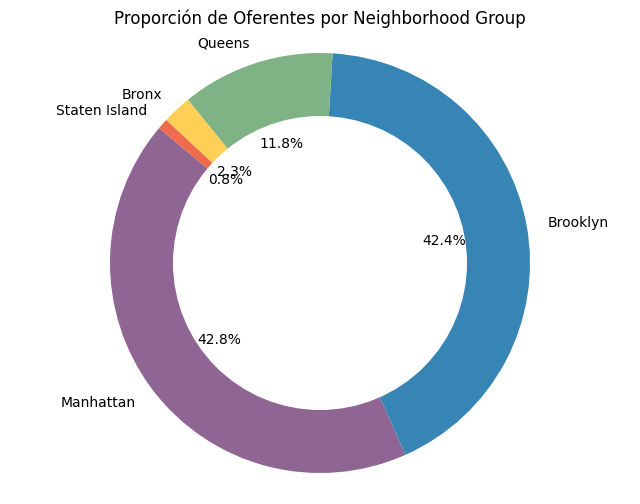

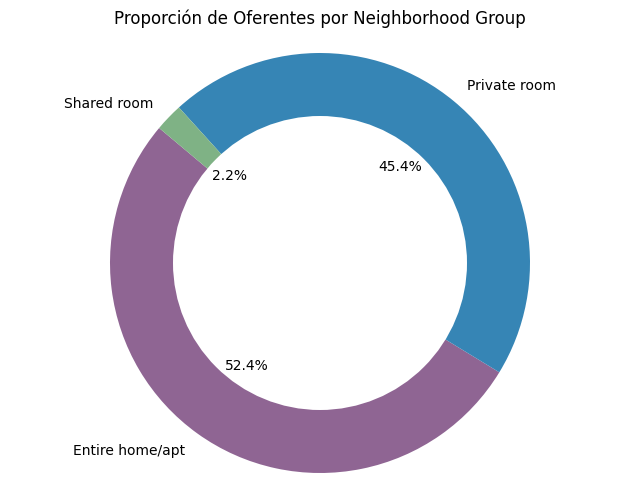

In [64]:
paleta= ['#8F6593', '#3685B5', '#7FB285', '#FFCF56', '#EE6C4D']
#Opcion donas
#localidad
plt.figure(figsize=(8, 6))
plt.pie(proporcion_neighbourhood, labels=proporcion_neighbourhood.index, autopct='%1.1f%%', startangle=140, colors=paleta)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Proporción de Oferentes por Neighborhood Group')
plt.axis('equal')
plt.show()

#Tipo de cuarto
plt.figure(figsize=(8, 6))
plt.pie(proporcion_room_type, labels=proporcion_room_type.index, autopct='%1.1f%%', startangle=140, colors=paleta)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Proporción de Oferentes por Neighborhood Group')
plt.axis('equal')
plt.show()

/var/folders/9r/73xgxgj17t7btpfss2pdczcr0000gn/T/ipykernel_1825/2278636184.py:2: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.countplot(data=base_airbnb, x='neighbourhood_group', hue='room_type', palette=paleta)


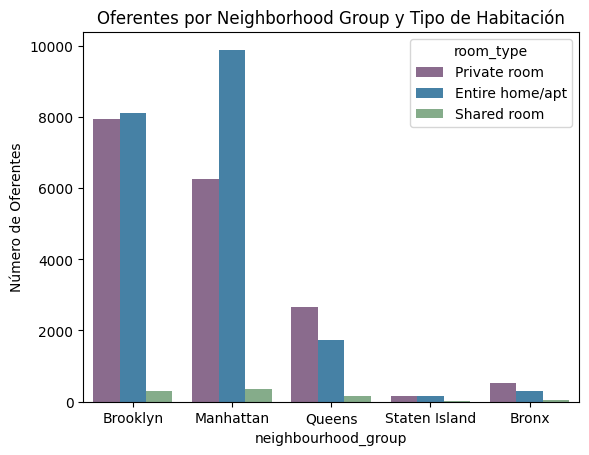

In [65]:
#Aca se ven dividio por localidad las proporciones de cada tipo de cuarto 
sns.countplot(data=base_airbnb, x='neighbourhood_group', hue='room_type', palette=paleta)
plt.title('Oferentes por Neighborhood Group y Tipo de Habitación')
plt.ylabel('Número de Oferentes')
plt.show()

#### Ejercicio 4
Realicen un histograma de los precios de los alojamientos. Comenten el gráfico obtenido. Además, respondan las siguientes preguntas: ¿cuál es el precio mínimo, máximo y promedio? ¿Cuál es la media de precio por “Neighbourhood group” y por tipo de habitación? 


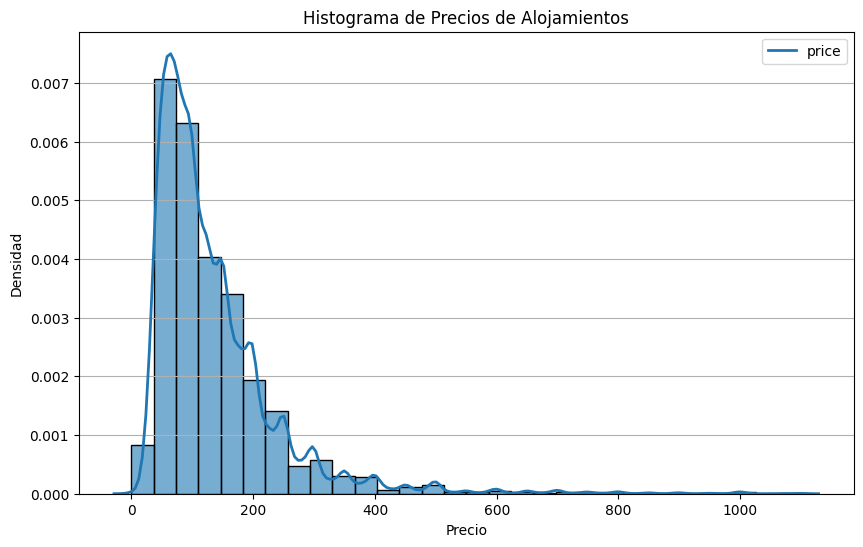

In [44]:
# Resolver acá
plt.figure(figsize=(10, 6))
sns.histplot(base_airbnb['price'], bins=30, color='#3685B5', kde=False, stat="density", alpha=0.6)
sns.kdeplot(base_airbnb['price'], color='#EE6C4D', linewidth=2)
plt.title('Histograma de Precios de Alojamientos')
plt.xlabel('Precio')
plt.ylabel('Densidad')
plt.grid(axis='y')
plt.show()

In [66]:
#Supongo que el precio minimo se va a ir cuando la base de datos este limpia del todo pero me parece raro que haya uno que salga 0 hay que revisar si no se va, me parece raro que el maximos ea 321 tmb 
precio_min = base_airbnb['price'].min()
precio_max = base_airbnb['price'].max()
precio_prom = base_airbnb['price'].mean()
print('Precio Mínimo: ' + str(precio_min))
print('Precio Máximo: ' + str(precio_max))
print(f'Precio Promedio: {precio_prom:.2f}')

Precio Mínimo: 0.0
Precio Máximo: 1100.0
Precio Promedio: 134.06


In [46]:
# Media por neighborhood_group
media_neighbourhood = base_airbnb.groupby('neighbourhood_group')['price'].mean()

# Media por room_type
media_room_type = base_airbnb.groupby('room_type')['price'].mean()

print('Media de Precio por Neighborhood Group:')
print(media_neighbourhood)

print('\nMedia de Precio por Tipo de Habitación:')
print(media_room_type)

Media de Precio por Neighborhood Group:
                          price       price
neighbourhood_group                        
Bronx                 77.383641   77.383641
Brooklyn             114.992713  114.992713
Manhattan            168.759413  168.759413
Queens                90.653093   90.653093
Staten Island         87.785256   87.785256

Media de Precio por Tipo de Habitación:
                      price       price
room_type                              
Entire home/apt  185.701505  185.701505
Private room      78.281587   78.281587
Shared room       54.902878   54.902878


#### Ejercicio 5
Realicen dos scatter plots con dos variables de interés en cada uno. Comenten.

/var/folders/9r/73xgxgj17t7btpfss2pdczcr0000gn/T/ipykernel_1825/804847198.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


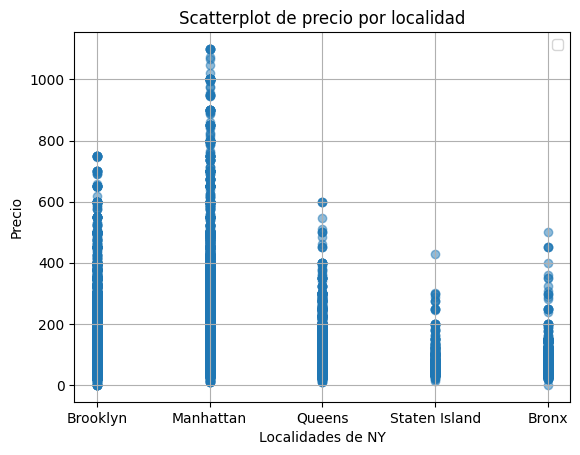

In [68]:
# Resolver acá
#SCATTERPLOT PRECIO POR LOCALIDAD
plt.scatter (x = base_airbnb['neighbourhood_group'], y = base_airbnb["price"], alpha = 0.5)
plt.title("Scatterplot de precio por localidad") 
plt.xlabel ("Localidades de NY")
plt.ylabel ("Precio")
plt.legend()
plt.grid()
plt. show()

/var/folders/9r/73xgxgj17t7btpfss2pdczcr0000gn/T/ipykernel_1825/1088885050.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


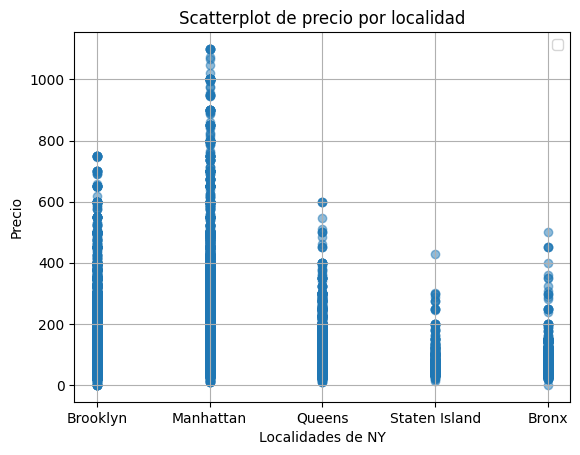

In [69]:
#SCATTERPLOT PRECIO POR TIPO DE HABITACIÓN
plt.scatter (x = base_airbnb['neighbourhood_group'], y = base_airbnb["price"], alpha = 0.5)
plt.title("Scatterplot de precio por localidad") 
plt.xlabel ("Localidades de NY")
plt.ylabel ("Precio")
plt.legend()
plt.grid()
plt. show()

/var/folders/9r/73xgxgj17t7btpfss2pdczcr0000gn/T/ipykernel_1825/536626881.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


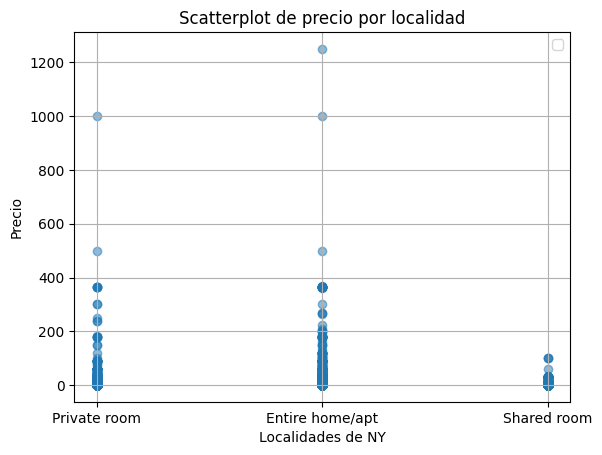

In [70]:
#SCATTERPLOT TIPO DE HABITACION POR MINIMO DE NOCHES
plt.scatter (x = base_airbnb['room_type'], y = base_airbnb["minimum_nights"], alpha = 0.5)
plt.title("Scatterplot de precio por localidad") 
plt.xlabel ("Localidades de NY")
plt.ylabel ("Precio")
plt.legend()
plt.grid()
plt. show()

#### Ejercicio 6
Utilicen el análisis de componentes principales para graficar las variables en dos dimensiones. Comenten los resultados obtenidos (qué porcentaje de la varianza se logra explicar con dos componentes, cómo son los *loadings*, si ven algún patrón en el gráfico).

In [71]:
# Resolver acá

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

In [82]:
print(base_airbnb.columns)

Index(['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'last_review', 'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'lower_precio_hab_loc', 'upper_precio_hab_loc',
       'neighbourhood_group_Bronx', 'neighbourhood_group_Brooklyn',
       'neighbourhood_group_Manhattan', 'neighbourhood_group_Queens',
       'neighbourhood_group_Staten Island', 'room_type_Entire home/apt',
       'room_type_Private room', 'room_type_Shared room', 'offer group'],
      dtype='object')


In [94]:
variables_pca = ['latitude', 'longitude', 'price', 'minimum_nights', 
                 'number_of_reviews', 'reviews_per_month', 
                 'calculated_host_listings_count', 'availability_365',
                 'neighbourhood_group_Bronx', 'neighbourhood_group_Brooklyn',
                 'neighbourhood_group_Manhattan', 'neighbourhood_group_Queens',
                 'neighbourhood_group_Staten Island',
                 'room_type_Entire home/apt', 'room_type_Private room', 
                 'room_type_Shared room','offer group']



base_variables_pca = base_airbnb.loc[:, variables_pca]

In [95]:
print(base_variables_pca.mean())
print(base_variables_pca.std())

latitude                                40.728153
longitude                              -73.951085
price                                  134.062054
minimum_nights                           5.857135
number_of_reviews                       29.398916
reviews_per_month                        1.378081
calculated_host_listings_count           5.159805
availability_365                       113.964485
neighbourhood_group_Bronx                0.022518
neighbourhood_group_Brooklyn             0.423665
neighbourhood_group_Manhattan            0.427867
neighbourhood_group_Queens               0.117856
neighbourhood_group_Staten Island        0.008094
room_type_Entire home/apt                0.523984
room_type_Private room                   0.454380
room_type_Shared room                    0.021636
offer group                          14533.173191
dtype: float64
latitude                                0.055025
longitude                               0.046688
price                                

In [98]:
# Escalamos las variables
# Inicializamos el transformador
scaler = StandardScaler(with_std=True, with_mean=True)
# Aplicamos fit_transform al DataFrame
base_airbnb_pca_transformada = pd.DataFrame(scaler.fit_transform(base_variables_pca), columns=base_variables_pca.columns)
print(base_airbnb_pca_transformada.mean()) # luego de la estandarización la media es cero
print(base_airbnb_pca_transformada.std()) # la desviación estandar es uno


latitude                            -1.113989e-13
longitude                            3.308087e-14
price                                1.769583e-17
minimum_nights                      -5.603678e-17
number_of_reviews                    0.000000e+00
reviews_per_month                    8.258052e-17
calculated_host_listings_count       3.539165e-17
availability_365                    -5.308748e-17
neighbourhood_group_Bronx           -2.654374e-17
neighbourhood_group_Brooklyn         9.142844e-17
neighbourhood_group_Manhattan       -8.552983e-17
neighbourhood_group_Queens           1.474652e-17
neighbourhood_group_Staten Island   -1.769583e-17
room_type_Entire home/apt            3.244235e-17
room_type_Private room              -3.760363e-17
room_type_Shared room               -2.949304e-18
offer group                         -3.539165e-17
dtype: float64
latitude                             1.000013
longitude                            1.000013
price                                1.0000

In [123]:
# Ajustamos el modelo PCA
# inicio objeto PCA
pca = PCA()
base_airbnb_pca = pca.fit_transform(base_airbnb_pca_transformada) # ya son los datos normalizados

In [124]:
# adentoro del PCA esta "explained_variance_ratio_" me dice cuanta varianza explica cada uno de los componentes principales
    # estan puestos por explicacion de varianza decreciente --> me quedo con los mas de arriba/primeros  porque me explica la mayoria de la varianza
    # si los sumo, las varianzas da =1
# % de la Varianza explicada por los componentes 
print("Varianza explicada:", pca.explained_variance_ratio_)

Varianza explicada: [1.86093586e-01 1.45981122e-01 1.15993969e-01 9.39281321e-02
 7.64574409e-02 7.01234008e-02 6.52561438e-02 6.18149144e-02
 5.48286724e-02 4.41531402e-02 3.03072406e-02 2.54761690e-02
 1.72357617e-02 1.23503079e-02 1.63429550e-16 1.15974268e-17
 0.00000000e+00]


In [125]:
varianza_total = sum(pca.explained_variance_ratio_)
print("Varianza total explicada:", varianza_total)

Varianza total explicada: 0.9999999999999998


In [126]:
# Loadings vectors
loading_pca = pca.components_ # cada fila corresponde a un CP y cada columna, a una variable
print("Loadings:\n", pca.components_)
print("Loadings del CP1:\n",pca.components_[0]) 
pca.components_[0,0] #loadings del CP1 variable 1


Loadings:
 [[ 4.48461616e-02 -4.08249201e-01  3.30036957e-01  6.95939009e-02
  -8.91169710e-02 -1.36061139e-01  8.87515002e-02 -7.41905463e-02
  -1.64280520e-01 -3.94287695e-02  3.39519593e-01 -3.79443446e-01
  -1.98771003e-02  3.35172977e-01 -3.23946964e-01 -4.18971859e-02
   4.12906212e-01]
 [-5.02183761e-01 -1.16514574e-01 -1.49710981e-01 -2.83378136e-02
  -3.50389438e-02 -7.70090514e-02 -8.28749862e-02 -9.72285384e-02
  -2.16696582e-01  5.82894176e-01 -3.74386645e-01 -2.27677877e-01
   3.08676854e-02 -1.12775341e-01  1.19233458e-01 -2.09311359e-02
   2.83704449e-01]
 [-2.68423391e-01  1.64935816e-01  2.75320653e-01  1.05243091e-02
   1.31146086e-01  1.57815675e-01  4.51882325e-02  1.63617578e-01
   9.09771618e-03  1.42430869e-01 -3.16316048e-01  2.42712695e-01
   7.26936615e-02  5.08634645e-01 -5.04312772e-01 -2.00694466e-02
  -2.36331811e-01]
 [-2.45081545e-02 -1.42777171e-01  2.13719481e-02 -1.21038579e-01
   6.33279759e-01  6.05036490e-01  4.59109963e-02  3.08133388e-01
  -8.883

np.float64(0.04484616156924912)

In [127]:

# Visualizamos features y loadings
for i, loading_pca in enumerate(loading_pca):
    print(f"\nLoading Vector CP{i+1}:")
    for j, feature in enumerate(base_airbnb.columns[:-1]):
        print(f"{feature}: {round(loading_pca[j],3)}")
    print()


Loading Vector CP1:
neighbourhood_group: 0.045
neighbourhood: -0.408
latitude: 0.33
longitude: 0.07
room_type: -0.089
price: -0.136
minimum_nights: 0.089
number_of_reviews: -0.074
last_review: -0.164
reviews_per_month: -0.039
calculated_host_listings_count: 0.34
availability_365: -0.379
lower_precio_hab_loc: -0.02
upper_precio_hab_loc: 0.335
neighbourhood_group_Bronx: -0.324
neighbourhood_group_Brooklyn: -0.042
neighbourhood_group_Manhattan: 0.413


IndexError: index 17 is out of bounds for axis 0 with size 17

### Parte III: Predicción

El objetivo de esta parte del trabajo es intentar predecir los precios de los alojamientos.

#### Ejercicio 7
Eliminen de la base todas las variables relacionadas al precio

In [ ]:
# Resolver acá


#### Ejercicio 8
Partan la base en una base de prueba (test) y una de entrenamiento (train) utilizando el comando <code>train_test_split</code>. La base de entrenamiento debe comprender el 70% de los datos, y la semilla a utilizar (*random state instance*) debe ser 201. Establezca a price como su variable dependiente en la base de entrenamiento (vector y). El resto de las variables ser´an las variables independientes (matriz X). Recuerden agregar la columna de unos (1).

In [ ]:
print(base_airbnb.columns)

In [ ]:
# Separar las características y el objetivo
x = base_airbnb.drop(['price', 'lower_precio_loc', 'upper_precio_loc',
       'lower_precio_hab_loc', 'upper_precio_hab_loc'], axis = 1)
y = base_airbnb['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=201)

# Imprimir los resultados
print("Conjunto de entrenamiento (X):")
print(x_train)
print("\nConjunto de prueba (X):")
print(x_test)
print("\nConjunto de entrenamiento (y):")
print(y_train)
print("\nConjunto de prueba (y):")
print(y_test)

#### Ejercicio 9
Implementen una regresión lineal y comenten los resultados obtenidos.

In [ ]:
# Resolver acá
model = LinearRegression().fit(x, y)

# Veamos ahora los resultados
# Calculamos el R2 --> cuanta variabilida explica el modelo --> no lo tengo en cuenta en la prediccion --> no lo tomo en cuenta porque es e R2 dde mis datos de entrenamiento, pero depsues queiro saber en los datos de tessteo
r2 = model.score(x, y)
print('Coeficiente de determinación (R2):', r2)

# El intercepto
intercepto = model.intercept_
print('\nIntercepto:', intercepto)

# La pendiente
pendiente = model.coef_
print('\nPendiente:', pendiente)